# Car Price pridiction

In [1]:
import pandas as pd

In [2]:
data_df = pd.read_csv('datasets/CarPrice_Assignment.csv')

In [3]:
data_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# Analysiszing the data set
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [10]:
check_df(data_df)

##################### Shape #####################
(205, 26)
##################### Types #####################
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object
##################### NA #####################
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration   

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

(205, 26)

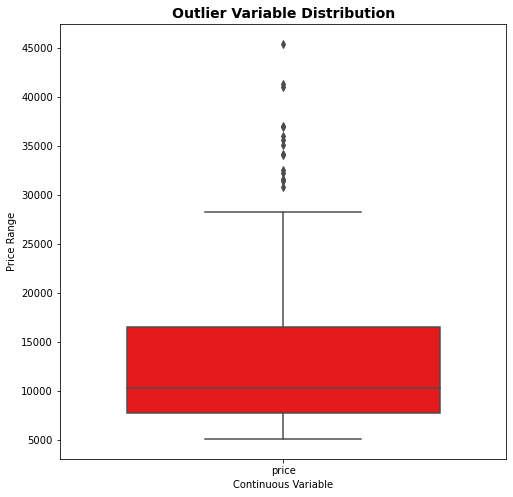

In [13]:
outliers = ['price']
plt.rcParams['figure.figsize'] = [8, 8]
sns.boxplot(data=data_df[outliers], orient="v", palette="Set1", whis=1.5, saturation=1, width=0.7)
plt.title("Outlier Variable Distribution", fontsize=14, fontweight='bold')
plt.ylabel('Price Range')
plt.xlabel('Continuous Variable')
data_df.shape

In [14]:
data_df.drop(['car_ID'], axis=1)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
data_df['CarName'] = data_df['CarName'].str.split(' ', expand=True)[0]

In [17]:
data_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [20]:
data_df['CarName'] = data_df['CarName'].replace({'maxda':'mazda', 'nissan':'Nissan', 'porcshce':'porsche', 'toyouta':'toyota',
                                        'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [21]:
data_df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [22]:
data_df['symboling'] = data_df['symboling'].astype('str')

In [27]:
#  Segregation of Numerical and categorical variable/columns
cat_col = data_df.select_dtypes(include=['object']).columns
num_col = data_df.select_dtypes(exclude=['object']).columns

In [28]:
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [29]:
num_col

Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

# Visualization of the data

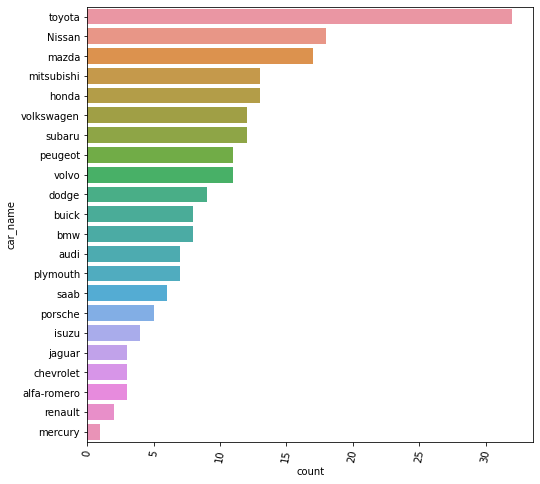

In [39]:
data_df_v = pd.DataFrame(data_df['CarName'].value_counts()).reset_index().rename(columns={'index':'car_name','CarName':'count'})
plot = sns.barplot(y='car_name',x='count',data=data_df_v)
plot = plt.setp(plot.get_xticklabels(), rotation=80)

# Visualizing the distribution of car Price

C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

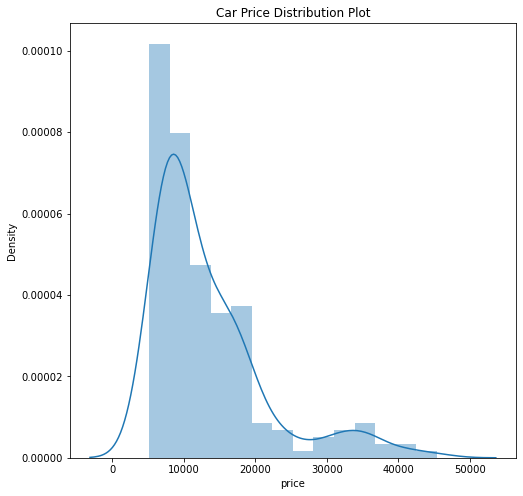

In [44]:
plt.figure(figsize=(8, 8))

plt.title('Car Price Distribution Plot')
sns.distplot(data_df['price'])

# Visualzing the numerical data

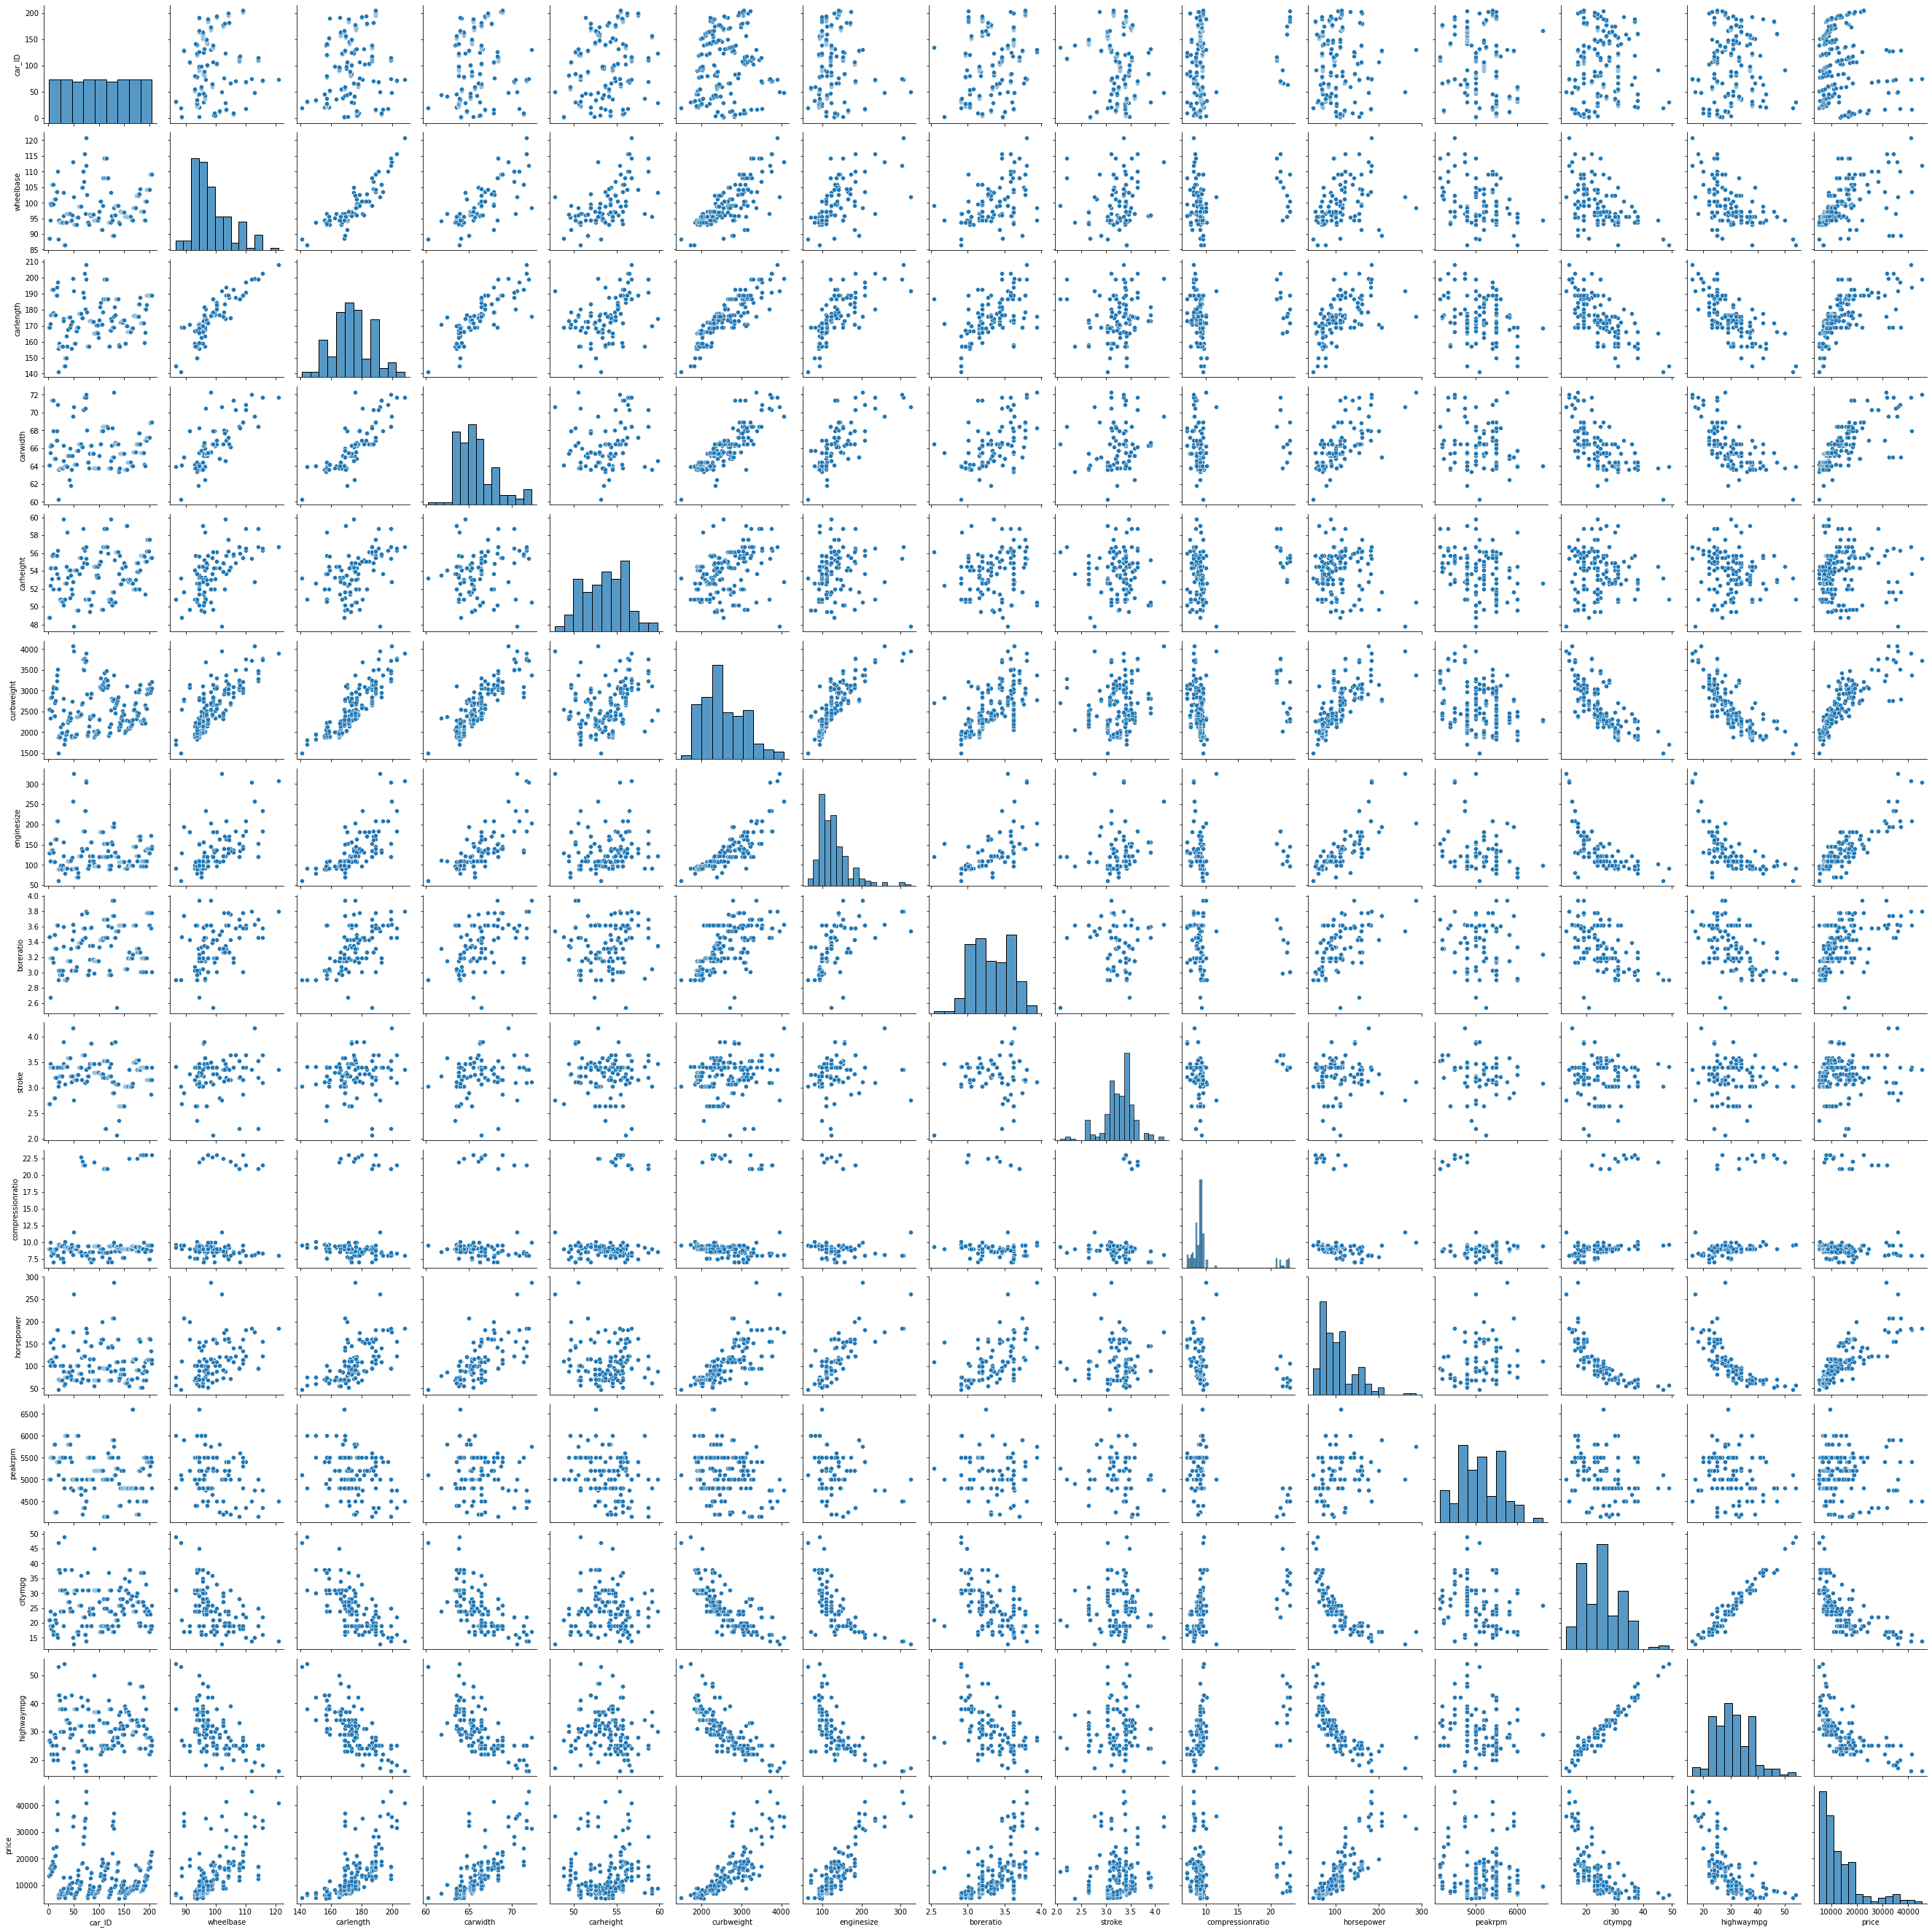

In [45]:
ax = sns.pairplot(data_df[num_col])

# Visualization of Categorical data

In [46]:
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

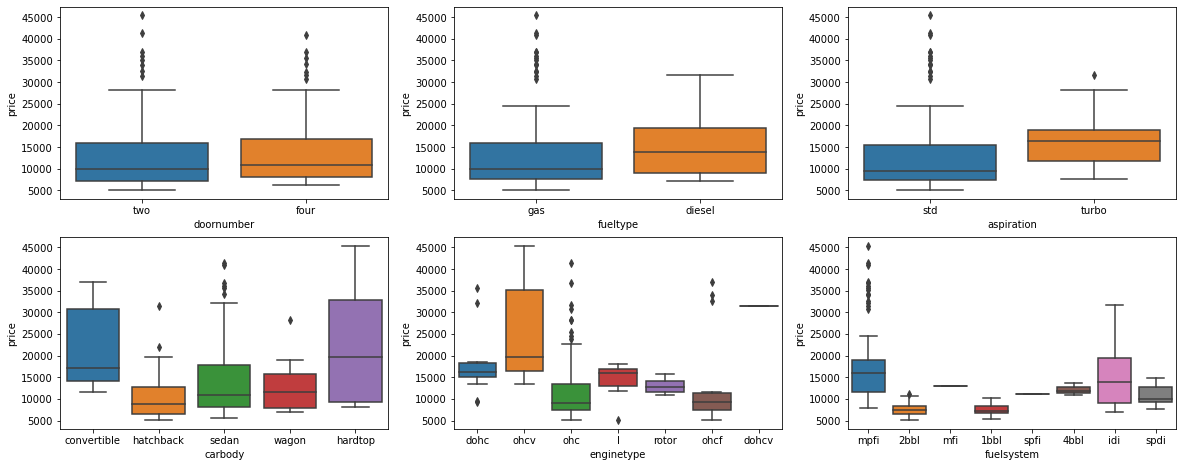

In [54]:
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.boxplot(x='doornumber', y='price', data=data_df)
plt.subplot(3, 3, 2)
sns.boxplot(x='fueltype', y='price', data=data_df)
plt.subplot(3, 3, 3)
sns.boxplot(x='aspiration', y='price', data=data_df)
plt.subplot(3, 3, 4)
sns.boxplot(x='carbody', y='price', data=data_df)
plt.subplot(3, 3, 5)
sns.boxplot(x='enginetype', y='price', data=data_df)
plt.subplot(3, 3, 6)
sns.boxplot(x='fuelsystem', y='price', data=data_df)
plt.show()

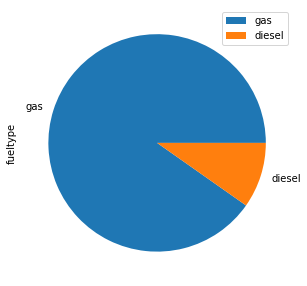

In [55]:
df_v = pd.DataFrame(data_df['fueltype'].value_counts())
plot = df_v.plot.pie(y='fueltype', figsize=(5, 5))

# Price Distribution of gas vs disesel

C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Price of a diesel vehicles')

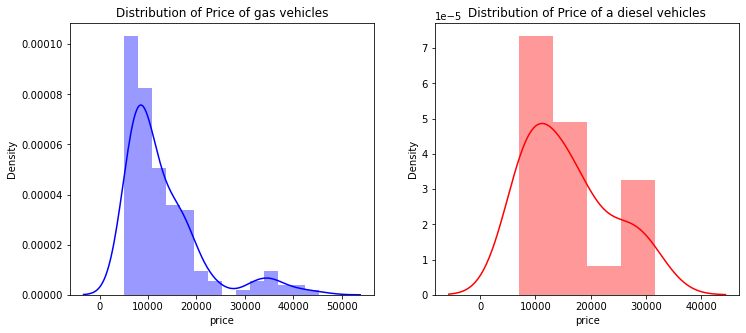

In [56]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(121)
sns.distplot(data_df[(data_df.fueltype=='gas')]['price'], color='b', ax=ax)
ax.set_title('Distribution of Price of gas vehicles')

ax = f.add_subplot(122)
sns.distplot(data_df[(data_df.fueltype=='diesel')]['price'], color='r', ax=ax)
ax.set_title('Distribution of Price of a diesel vehicles')

<AxesSubplot:xlabel='fueltype', ylabel='price'>

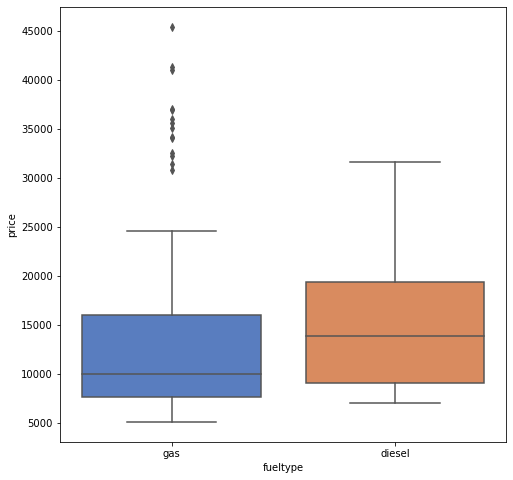

In [60]:
sns.boxplot(x='fueltype', y='price', data=data_df, palette='muted')

# Aspiration ration

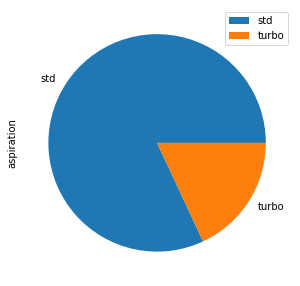

In [63]:
df_v = pd.DataFrame(data_df['aspiration'].value_counts())
plot = df_v.plot.pie(y='aspiration', figsize=(5, 5))

# Price Distribution of std and turbo

C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'price Distribution of std aspiration vehicels')

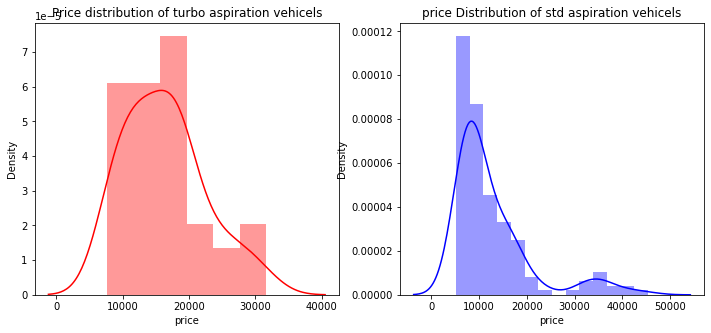

In [64]:
f = plt.figure(figsize=(12, 5))
ax = f.add_subplot(121)
plot = sns.distplot(data_df[(data_df.aspiration=='turbo')]['price'], color='r', ax=ax)
ax.set_title('Price distribution of turbo aspiration vehicels')

ax = f.add_subplot(122)
plot = sns.distplot(data_df[(data_df.aspiration=='std')]['price'], color='b', ax=ax)
ax.set_title('price Distribution of std aspiration vehicels')

<AxesSubplot:xlabel='aspiration', ylabel='price'>

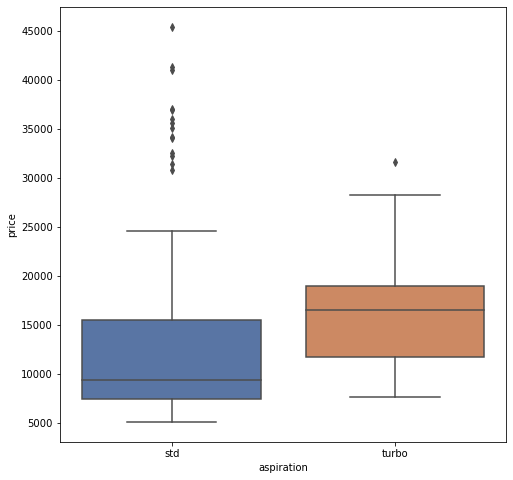

In [65]:
sns.boxplot(x='aspiration', y='price', data=data_df, palette='deep')

# Symboling

<AxesSubplot:xlabel='symboling', ylabel='count'>

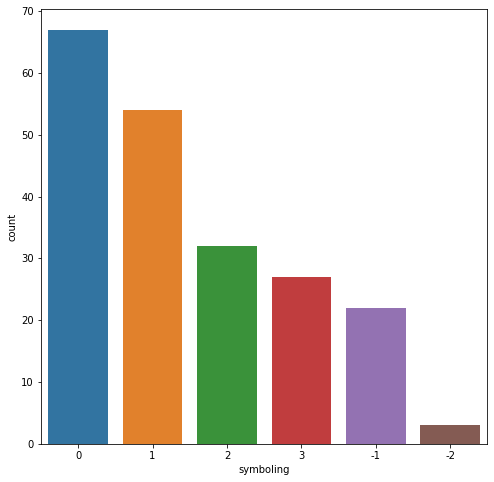

In [66]:
df_v = pd.DataFrame(data_df['symboling'].value_counts()).reset_index().rename(columns={'index':'symboling', 'symboling':'count'})
sns.barplot(x='symboling', y='count', data=df_v)

# price Distribution according to symboling

<AxesSubplot:xlabel='symboling', ylabel='price'>

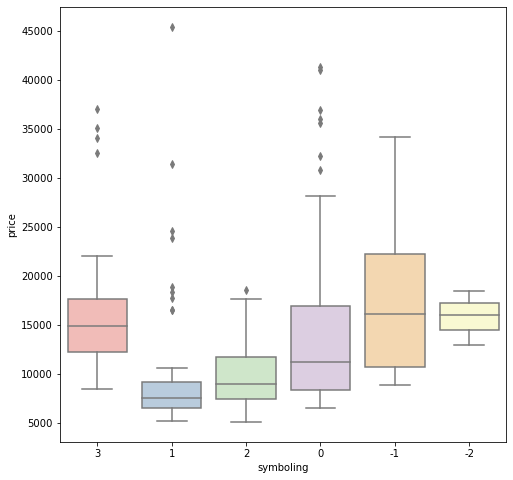

In [67]:
sns.boxplot(x='symboling', y='price', data=data_df, palette='Pastel1')

# Door Number

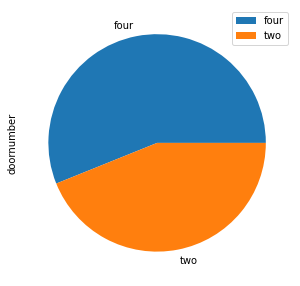

In [68]:
df_v = pd.DataFrame(data_df['doornumber'].value_counts())
plot = df_v.plot.pie(y='doornumber', figsize=(5, 5))

# Price distribution according to door number

C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amanb\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price with four doors of a car')

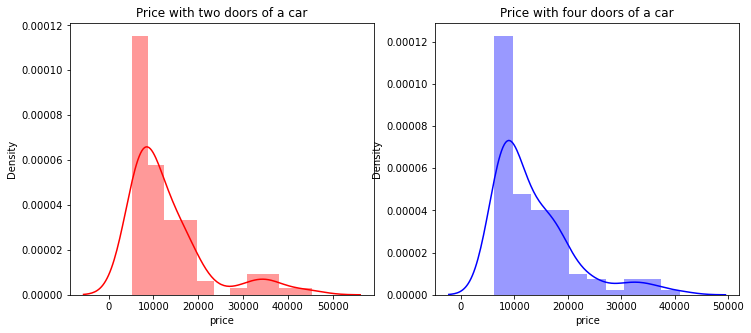

In [73]:
f = plt.figure(figsize=(12, 5))

ax = f.add_subplot(121)
plot = sns.distplot(data_df[(data_df.doornumber=='two')]['price'], color='r', ax=ax)
ax.set_title('Price with two doors of a car')

ax = f.add_subplot(122)
plot = sns.distplot(data_df[(data_df.doornumber=='four')]['price'], color='b', ax=ax)
ax.set_title('Price with four doors of a car')

<AxesSubplot:xlabel='doornumber', ylabel='price'>

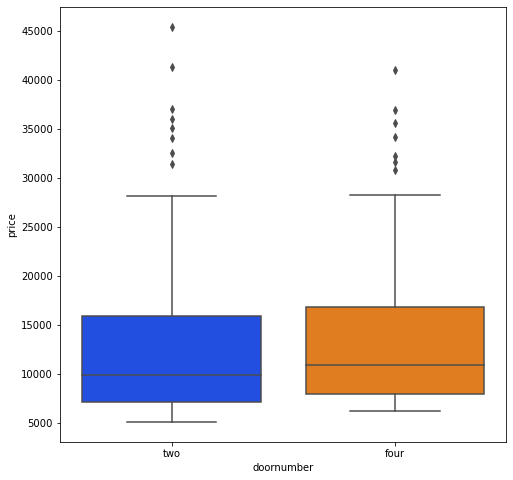

In [74]:
sns.boxplot(x='doornumber', y='price', data=data_df, palette='bright')

# Carbody

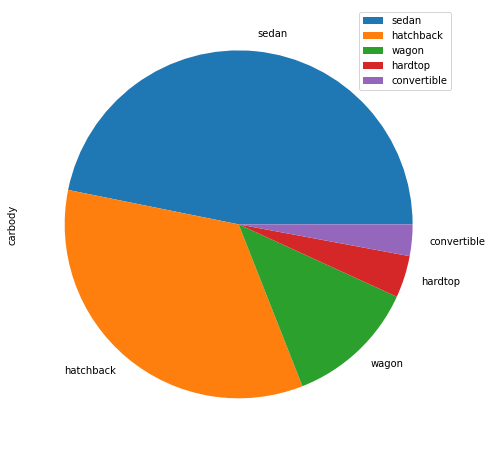

In [75]:
df_v = pd.DataFrame(data_df['carbody'].value_counts())
plot = df_v.plot.pie(y='carbody', figsize=(8, 8))

# Price distribution according to carbody

<AxesSubplot:xlabel='carbody', ylabel='price'>

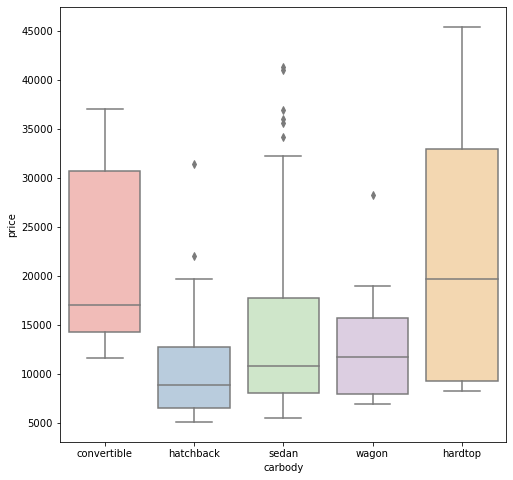

In [76]:
sns.boxplot(x='carbody', y='price', data=data_df, palette='Pastel1')

Engine Type

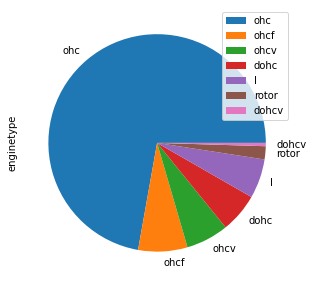

In [77]:
df_v = pd.DataFrame(data_df['enginetype'].value_counts())
plot = df_v.plot.pie(y='enginetype', figsize=(5, 5))

<AxesSubplot:xlabel='enginetype', ylabel='price'>

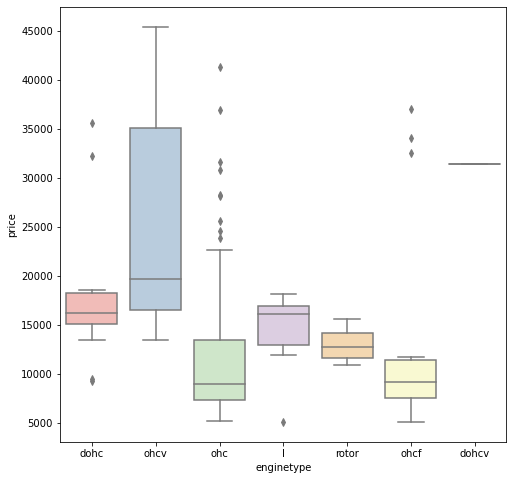

In [79]:
sns.boxplot(x='enginetype', y='price', data=data_df, palette='Pastel1')

# Fuel system

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

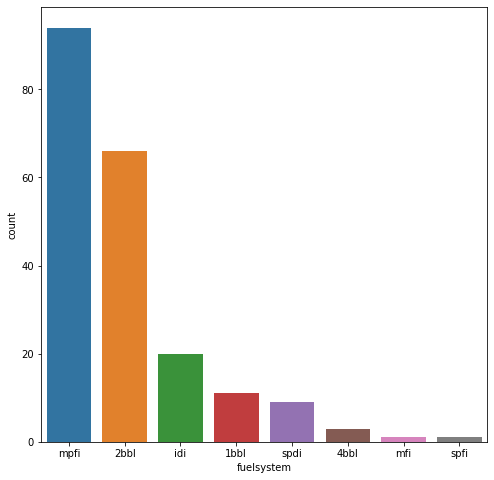

In [80]:
df_v = pd.DataFrame(data_df['fuelsystem'].value_counts()).reset_index().rename(columns={'index':'fuelsystem', 'fuelsystem':'count'})
sns.barplot(x='fuelsystem', y='count', data=df_v)

Price distribution according to fuel system

<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

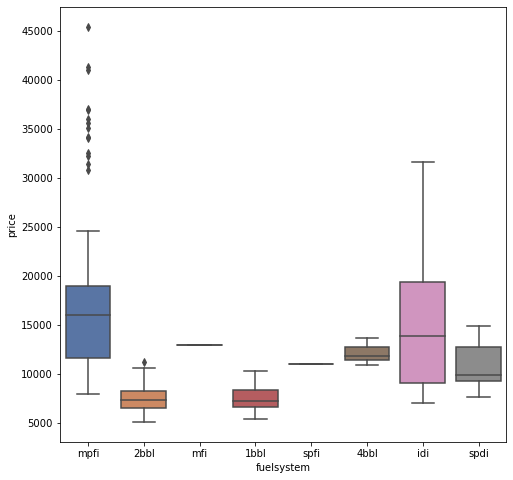

In [81]:
sns.boxplot(x='fuelsystem', y='price', data=data_df, palette='deep')

Wheel base vs Price

<AxesSubplot:xlabel='wheelbase', ylabel='price'>

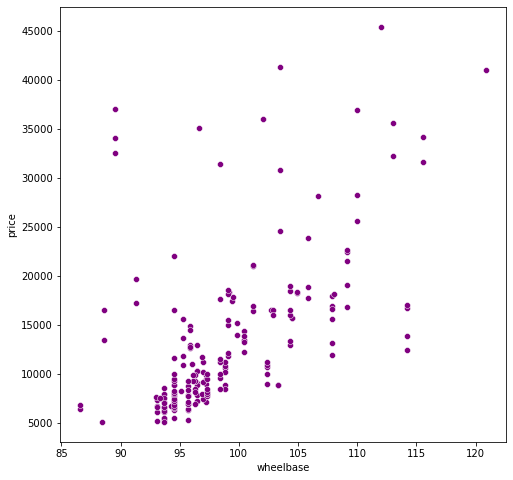

In [82]:
sns.scatterplot(x='wheelbase', y='price', data=data_df, color='purple')

Horse power vs price

<AxesSubplot:xlabel='horsepower', ylabel='price'>

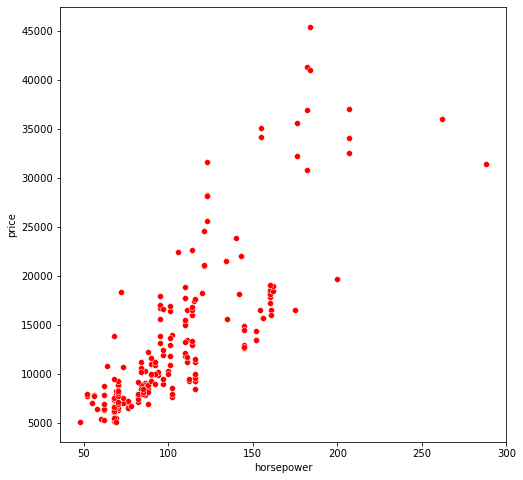

In [83]:
sns.scatterplot(x='horsepower', y='price', data=data_df, color='r')

horse power vs carbody 

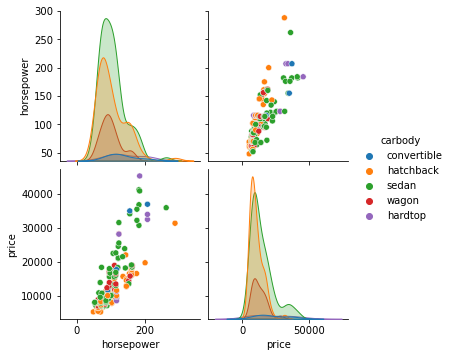

In [84]:
sns.pairplot(data_df[['horsepower', 'price', 'carbody']], hue="carbody")

Correalation table

In [85]:
data_df[num_col].corr()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
wheelbase,0.129729,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.150276,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


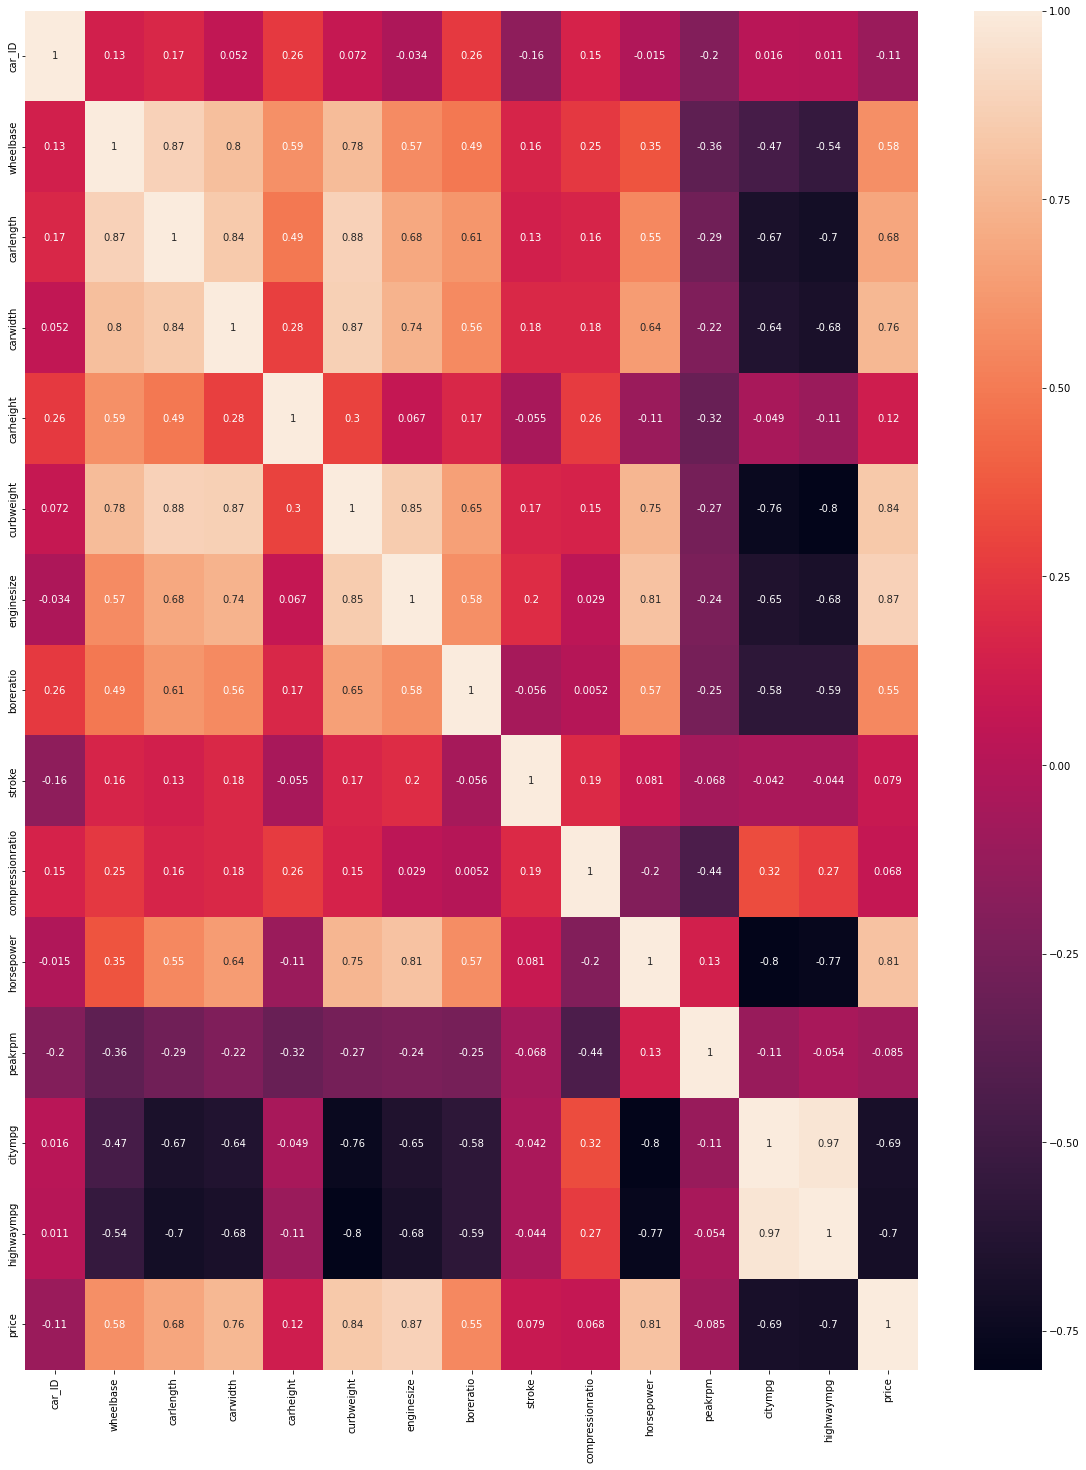

In [87]:
plt.figure(figsize=(20, 25))
sns.heatmap(data_df[num_col].corr(), annot=True)
plt.show()